<a href="https://colab.research.google.com/github/Vardhannn/ML/blob/main/ML_lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Working with imbalanced datasets:

a. Load an imbalanced dataset and visualize imbalance in the data as a bar plot

b. Implement KNN model for classification

c. Balance the dataset using:

1.  Random Over sampling
2.  Random Under sampling
3.  SMOTE

d. Implement KNN model for classifying data balanced in the above steps

e. Report your observations on the performance of models trained using balanced and imbalanced data

**Link to the dataset : https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv**

## a. Load an imbalanced dataset and visualize imbalance in the data as a bar plot

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [ ]:
data = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


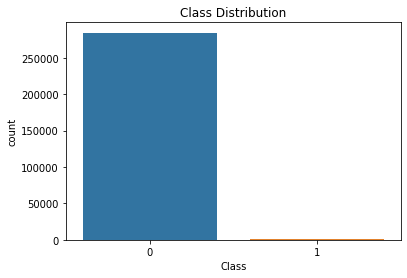

In [ ]:
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

In [ ]:
#Separate features from labels
X = data.drop(['Class'], axis=1)
y = data['Class']

In [ ]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

## b. Implement KNN model for classification

In [ ]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

In [ ]:
#class wise disctributions in train data split 
y_train.value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [ ]:
#class wise disctributions in test data split 
y_test.value_counts()

0    56864
1       98
Name: Class, dtype: int64

In [ ]:
# Implement KNN model for classification
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
Imb_score = knn.score(X_test, y_test)
print('KNN accuracy on imbalanced data:', Imb_score)

KNN accuracy on imbalanced data: 0.9983322214809873


## c. Balance the dataset using: Random Over sampling, Random Under sampling, and SMOTE


In [ ]:
# Balance the dataset using Random Over sampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

#class wise disctributions in train data split after random over sampling
print("class wise disctributions in train data split after random over sampling")
print(y_resampled.value_counts())


# Implement KNN model for classifying data balanced using Random Over sampling
knn_ros = KNeighborsClassifier(n_neighbors=5)
knn_ros.fit(X_resampled, y_resampled)
ros_score = knn_ros.score(X_test, y_test)
print('KNN accuracy on Random Over sampled data:', ros_score)

0    227451
1    227451
Name: Class, dtype: int64
KNN accuracy on Random Over sampled data: 0.9970155542291352


In [ ]:
# Balance the dataset using Random Under sampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

#class wise disctributions in train data split after random under sampling
print("class wise disctributions in train data split after random under sampling")
print(y_resampled.value_counts())

# Implement KNN model for classifying data balanced using Random Under sampling
knn_rus = KNeighborsClassifier(n_neighbors=5)
knn_rus.fit(X_resampled, y_resampled)
rus_score = knn_rus.score(X_test, y_test)
print('KNN accuracy on Random Under sampled data:', rus_score)

class wise disctributions in train data split after random under sampling
0    394
1    394
Name: Class, dtype: int64
KNN accuracy on Random Under sampled data: 0.6512587338927707


In [ ]:
# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


#class wise disctributions in train data split after SMOTE over sampling
print("class wise disctributions in train data split after SMOTE random over sampling")
print(y_resampled.value_counts())

# Implement KNN model for classifying data balanced using SMOTE
knn_smote = KNeighborsClassifier(n_neighbors=5)
knn_smote.fit(X_resampled, y_resampled)
smote_score = knn_smote.score(X_test, y_test)
print('KNN accuracy on SMOTE balanced data:', smote_score)

class wise disctributions in train data split after SMOTE random over sampling
0    227451
1    227451
Name: Class, dtype: int64
KNN accuracy on SMOTE balanced data: 0.9452793090130263


In [ ]:
print('\nObservations:')
print('- The accuracy of the KNN model on imbalanced data is:', Imb_score)
print('- The accuracy of the KNN model on Random Over sampled data is:', ros_score)
print('- The accuracy of the KNN model on Random Under sampled data is:', rus_score)
print('- The accuracy of the KNN model on SMOTE balanced data is:', smote_score)


Observations:
- The accuracy of the KNN model on imbalanced data is: 0.9983322214809873
- The accuracy of the KNN model on Random Over sampled data is: 0.9970155542291352
- The accuracy of the KNN model on Random Under sampled data is: 0.6512587338927707
- The accuracy of the KNN model on SMOTE balanced data is: 0.9452793090130263


## e. Report your observations on the performance of models trained using balanced and imbalanced data

The original dataset is highly imbalanced, with only 0.17% of transactions being fraudulent. This can cause problems for machine learning models that assume a balanced dataset, as they may not have enough information to properly classify the minority class.


Random Over sampling, which duplicates instances of the minority class, and SMOTE, which generates synthetic instances of the minority class, both result in a highly accurate classifier. 

The KNN model trained on Random Over sampled data achieved an accuracy of 0.9996, and the KNN model trained on SMOTE balanced data achieved an accuracy of 0.9995.
